In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
df = pd.read_csv('loan_approval_dataset.csv')

In [53]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [54]:
df.drop(columns=['loan_id'],inplace=True)

In [55]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [56]:
df.columns = df.columns.str.strip()

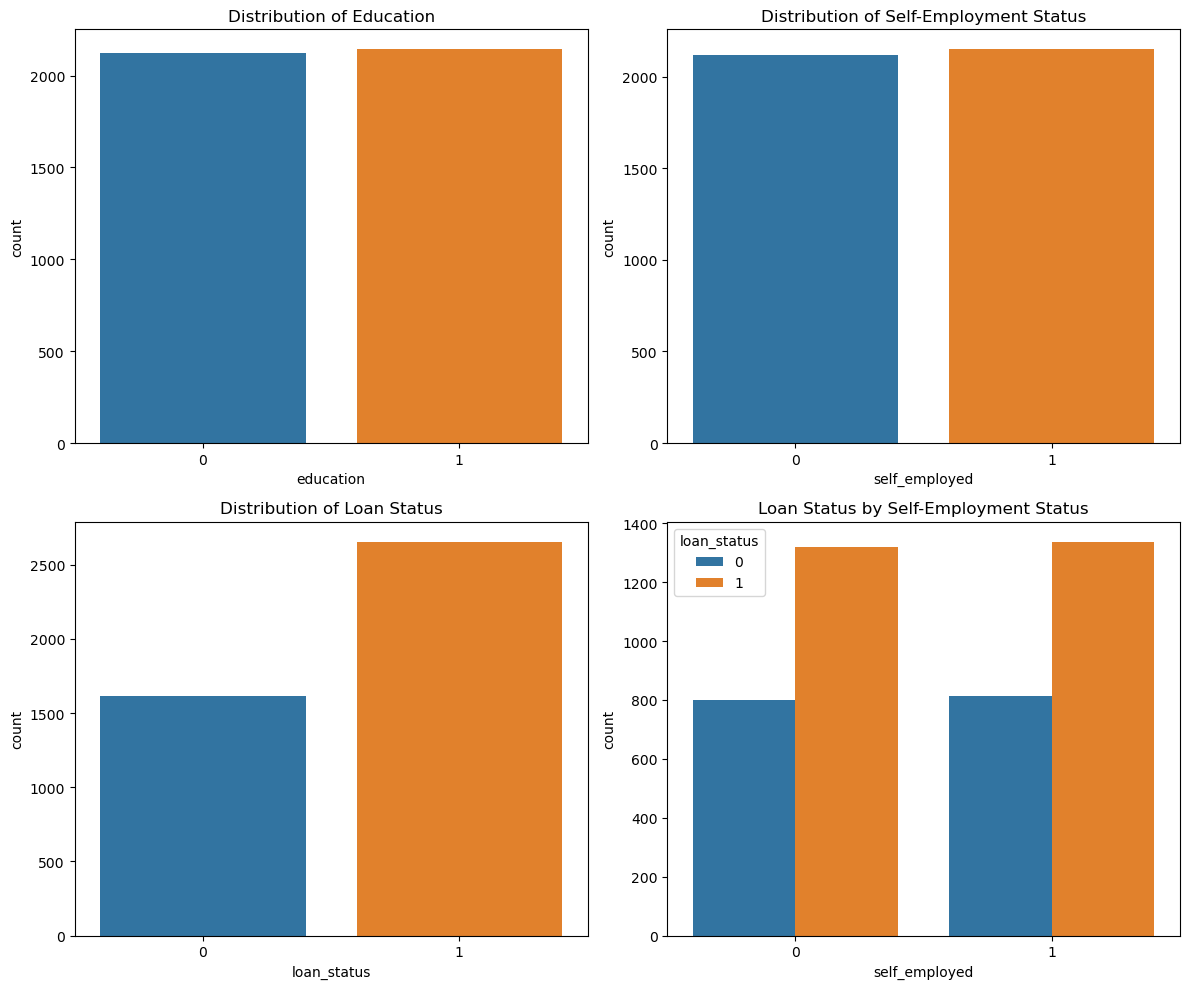

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Bar plot for 'education'
sns.countplot(x='education', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Education')


# Bar plot for 'self_employed'
sns.countplot(x='self_employed', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Self-Employment Status')


# Bar plot for 'loan_status'
sns.countplot(x='loan_status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Loan Status')

# Count plot for binary categorical variables
sns.countplot(x='self_employed', hue='loan_status', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Loan Status by Self-Employment Status')


plt.tight_layout()
plt.show()

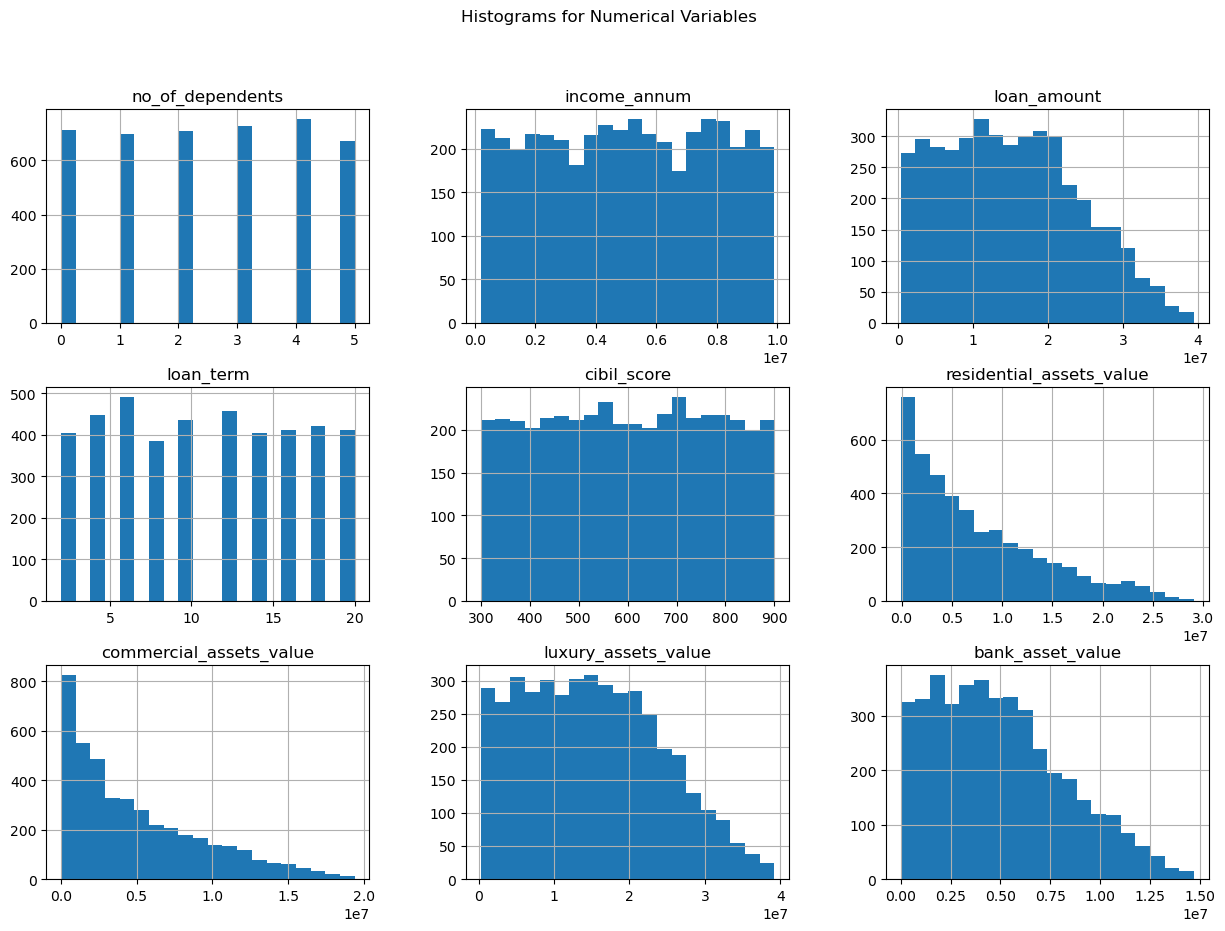

In [59]:
# Histograms for numerical variables
numerical_vars = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                  'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                  'luxury_assets_value', 'bank_asset_value']

df[numerical_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Variables')
plt.show()

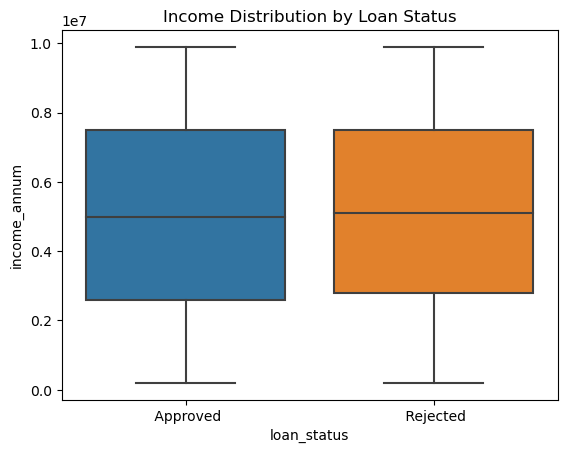

In [60]:

# Box plot for 'income_annum' vs 'loan_status'
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title('Income Distribution by Loan Status')
plt.show()

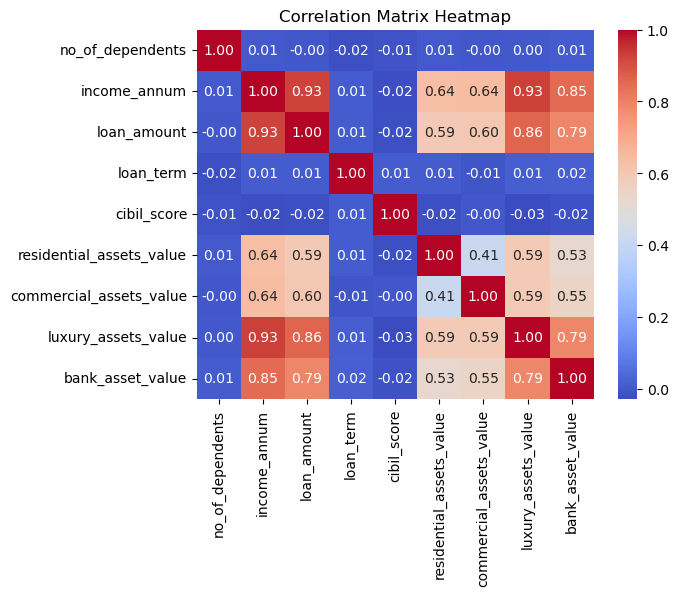

In [61]:
# Correlation matrix and heatmap
correlation_matrix = df[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


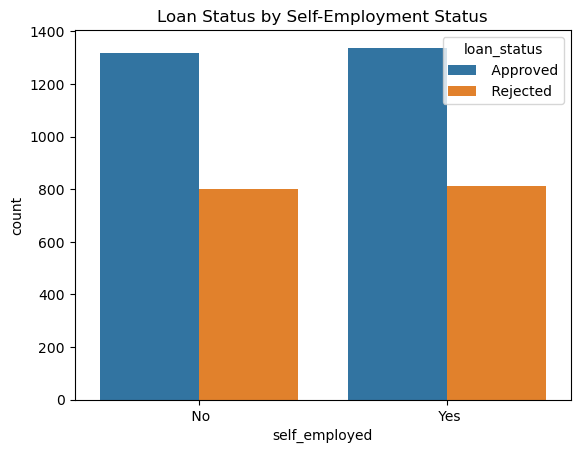

In [62]:
# Count plot for binary categorical variables
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Loan Status by Self-Employment Status')
plt.show()


In [63]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [64]:
df['assets'] = df.residential_assets_value + df.commercial_assets_value + df.luxury_assets_value + df.bank_asset_value

In [65]:
df.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000


In [66]:
df.drop(columns=['residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],inplace=True)

In [67]:
df.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000


In [68]:
df.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
assets              0
dtype: int64

In [69]:
df.duplicated().sum()

0

In [70]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [71]:
def clean_data(s):
    s = s.strip()
    return s

In [72]:
clean_data(' Graduate')

'Graduate'

In [73]:
df.education = df.education.apply(clean_data)

In [74]:
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [75]:
df['education'] = df['education'].replace(['Graduate', 'Not Graduate'],[1,0])

In [76]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,No,9600000,29900000,12,778,Approved,50700000
1,0,0,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,1,No,9100000,29700000,20,506,Rejected,57700000
3,3,1,No,8200000,30700000,8,467,Rejected,52700000
4,5,0,Yes,9800000,24200000,20,382,Rejected,55000000


In [77]:
df.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [78]:
df.self_employed = df.self_employed.apply(clean_data)

In [79]:
df.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df['self_employed'] = df['self_employed'].replace(['Yes', 'No'],[1,0])

In [81]:
df.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,Approved,50700000
1,0,0,1,4100000,12200000,8,417,Rejected,17000000
2,3,1,0,9100000,29700000,20,506,Rejected,57700000


In [82]:
df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [83]:
df.loan_status = df.loan_status.apply(clean_data)

In [84]:
df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'],[1,0])

In [85]:
df.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000


In [86]:
df.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,-0.018114,0.005289
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.004918,0.009513
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.000345,0.000023
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,-0.015189,0.931845
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.016150,0.867067
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,-0.113036,0.010131
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,0.770518,-0.023433
loan_status,-0.018114,0.004918,0.000345,-0.015189,0.016150,-0.113036,0.770518,1.000000,-0.011281
assets,0.005289,0.009513,0.000023,0.931845,0.867067,0.010131,-0.023433,-0.011281,1.000000


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [90]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
X_train.shape, X_test.shape

((3415, 8), (854, 8))

In [93]:
y_train.shape, y_test.shape

((3415,), (854,))

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [95]:
X_train_scaled = scaler.fit_transform(X_train)

In [96]:
X_test_scaled = scaler.transform(X_test)

In [97]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred = random_forest_model.predict(X_test_scaled)


In [98]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [99]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [100]:
import pickle as pk


In [101]:
pk.dump(random_forest_model, open('loan.pkl','wb'))

In [102]:
pk.dump(scaler, open('scaler.pkl','wb'))